# Segmentationa and Clustering Neighborhood in Toronto
### By Harshit Gupta

## Part 1

### Importing the necessary libraries

In [3]:
import pandas as pd
!pip install wikipedia 
import wikipedia as wp
from bs4 import BeautifulSoup

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=ada9abd5daf59230f1398b98f3068b717fb0df363485029ccefebb9daa1bc858
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


### Web Scrapping

In [0]:
wikipage = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
dataframe = pd.read_html(wikipage, header = 0)[0]
dataframe = dataframe[dataframe.Borough != 'Not assigned']
dataframe = dataframe.groupby(['Postal Code', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
for index, row in dataframe.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']

### Part 1 Output

In [5]:
dataframe

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


## Part 2

## Importing Libraries

In [0]:
import io
import requests

## Using the Foresquare API

In [0]:
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

c.columns = ['Postal Code', 'Latitude', 'Longitude']
dataframe = pd.merge(c, dataframe, on='Postal Code')
dataframe = dataframe[['Postal Code', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]

### Part 2 Output

In [8]:
dataframe

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


## Part 3

### Importing Libraries

In [9]:
%matplotlib inline
!pip install shapely
from shapely.geometry import Point
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

     |████████████████████████████████| 931kB 8.8MB/s 
     |████████████████████████████████| 10.9MB 14.5MB/s 
     |████████████████████████████████| 14.7MB 257kB/s 


### Loading Coordinates

In [0]:
dataframe['Coordinates'] = list(zip(dataframe.Longitude, dataframe.Latitude))
dataframe['Coordinates'] = dataframe['Coordinates'].apply(Point)
gdataframe = gpd.GeoDataFrame(dataframe, geometry='Coordinates')


### Part 3 Output

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


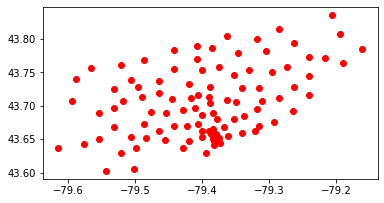

In [12]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')
gdataframe.plot(ax=ax, color='red')
plt.show()